Walkthrough VCF vs Field Site Methods
--------------------

Methods:
* introduce overlap + clumping
* correction equations of 4 combinations of enforced-unenforced overlap-clumping
* scale down mvcf to 100 m, apply correction, then transform mvcf back to 250 m
* mask out relevant forest-savanna regions in tropics on MCD12Q1
* resample corrected mvcf to 500 m grid, merge with MCD12Q1

In [1]:
import numpy  as np
import pandas as pd
import csv as yay
import math

import matplotlib.pyplot as plt

Step 1: Introducing 'overlap' to account for canopy overlap within field site (enforced vs. unenforced)

Step 2: MVCF multiplied by 0.8 to make it comparable to CAI tree cover value. Size mismatch between field site and pixel addressed by introducing 'clumping' (enforced vs. unenforced)

Step 3: Create correction equations for: enforced overlap – enforced clumping; enforced overlap – unenforced clumping; unenforced overlap – enforced clumping; unenforced overlap – unenforced clumping using

𝑙𝑜𝑔𝑖𝑡(𝑉𝐶𝐹)=𝐶0+𝛥×𝑙𝑜𝑔(𝐶𝜏1/(1−𝐶𝜏2)(Equation 1)

here 𝐶0,𝛥,𝜏1,𝜏2are optimised parameters and VCF and C are the MODIS VCF pixel and TROBIT site probability distributions, respectively. 


Step 4: MVCF is converted to 100 m x 100 m pixel size to make it comparable to field sites, then apply corrections. Corrected MVCF then rescaled back to original 250 m x 250 m pixel size


Step 5: Tropics mapped out on 500 m MCD12Q1 product, excluding cover types not considered as ‘forest’ or ‘savanna’ 

Step 6: Resample corrected 250 m x 250 m MVCF pixels to 500 m grid to combine with masked MCD12Q1 map of tropics to create land-cover-specific MVCF frequency distributions across the tropics

In [2]:
path = '../data/trobit_vcf_comparison.csv'

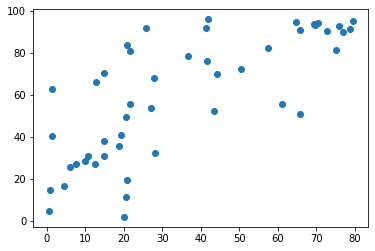

In [3]:
df = pd.read_csv(path)
plt.scatter(df['mvcf_pct'], df['trobit_pct'])